In [15]:
import os
import geopandas as gp
import pandas as pd
wd = os.getcwd()
prec_fold = os.path.join(wd,'prec_files')
raw = os.path.join(prec_fold,'raw-from-source')

In [45]:
#Import Files needed
#vest = gp.read_file(os.path.join(raw,'missing_precincts.shp'))
nc22 = gp.read_file(os.path.join(raw,'SBE_PRECINCTS_20220831.shp'))
nc19 = gp.read_file(os.path.join(raw,'PRECINCTS_20190827.shp'))
nc19_sub = nc19[nc19['enr_desc'].isin(['CV_CAROLINA VILLAGE','01-07A','07-07A'])]
nc19_sub

,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,geometry
2059,2016,07-07A,07-07A,WAKE,07-07,92,"POLYGON ((2097254.466 776939.253, 2097170.528 ..."
2689,2694,01-07A,01-07A,WAKE,01-07,92,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2696,2700,CV,CV_CAROLINA VILLAGE,HENDERSON,None,45,"POLYGON ((973349.550 598008.698, 973249.732 59..."


In [46]:
#View the VEST data and dissolve just to have one shape for performing the symmetric difference (not a requirement though)
display(nc19_sub)
nc19_sub['HOLD'] = 'DIS'
nc19_sub_dis = nc19_sub.dissolve(by='HOLD')
display(nc19_sub_dis)

,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,geometry
2059,2016,07-07A,07-07A,WAKE,07-07,92,"POLYGON ((2097254.466 776939.253, 2097170.528 ..."
2689,2694,01-07A,01-07A,WAKE,01-07,92,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2696,2700,CV,CV_CAROLINA VILLAGE,HENDERSON,None,45,"POLYGON ((973349.550 598008.698, 973249.732 59..."


C:\Users\SpencerNelson\anaconda3\envs\maup\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,id,prec_id,enr_desc,county_nam,of_prec_id,county_id
HOLD,,,,,,,
DIS,"MULTIPOLYGON (((973261.406 597916.117, 973281....",2016,07-07A,07-07A,WAKE,07-07,92


In [47]:
#Set CRS and perform symmetric difference to make holes where precincts will go
crs = nc22.crs
nc19_sub_dis = nc19_sub_dis.to_crs(crs)
nc22_holes = gp.overlay(nc22,nc19_sub_dis,how='symmetric_difference')

C:\Users\SpencerNelson\AppData\Local\Temp\ipykernel_14488\527463922.py:4: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  nc22_holes = gp.overlay(nc22,nc19_sub_dis,how='symmetric_difference')


In [48]:
#Remove the one value that was added (it's just a little line as the extents don't exactly match up, this is okay though)
print(len(nc22))
print(len(nc22_holes))
display(nc22_holes[nc22_holes['county_nam_1'].isna()])
nc22_holes = nc22_holes[~nc22_holes['county_nam_1'].isna()]
print(len(nc22_holes))

2652
2653


,id_1,prec_id_1,enr_desc_1,county_nam_1,of_prec_id_1,county_id_1,id_2,prec_id_2,enr_desc_2,county_nam_2,of_prec_id_2,county_id_2,geometry
2652,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,07-07A,07-07A,WAKE,07-07,92.0,"POLYGON ((970913.482 599183.446, 970913.234 59..."


2652


In [49]:
#Subset out Hendersonville-2 and explode to break up the polygons to clean
hendersonville2 = nc22_holes[nc22_holes['enr_desc_1']=='HENDERSONVILLE-2']
display(hendersonville2)
hendersonville2_ex = hendersonville2.explode()
display(hendersonville2_ex)

,id_1,prec_id_1,enr_desc_1,county_nam_1,of_prec_id_1,county_id_1,id_2,prec_id_2,enr_desc_2,county_nam_2,of_prec_id_2,county_id_2,geometry
1844,1968.0,HV-2,HENDERSONVILLE-2,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((972037.855 581066.196, 971978...."


C:\Users\SpencerNelson\AppData\Local\Temp\ipykernel_14488\2566856036.py:4: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  hendersonville2_ex = hendersonville2.explode()


id_1 prec_id_1        enr_desc_1 county_nam_1 of_prec_id_1  \
1844 0  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   
     1  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   
     2  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   
     3  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   
     4  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   
     5  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   
     6  1968.0      HV-2  HENDERSONVILLE-2    HENDERSON         None   

        county_id_1  id_2 prec_id_2 enr_desc_2 county_nam_2 of_prec_id_2  \
1844 0         45.0   NaN       NaN        NaN          NaN          NaN   
     1         45.0   NaN       NaN        NaN          NaN          NaN   
     2         45.0   NaN       NaN        NaN          NaN          NaN   
     3         45.0   NaN       NaN        NaN          NaN          NaN   
     4         45.0   NaN       NaN        NaN          NaN          NaN   
     5         45.0   NaN       NaN        NaN          NaN          NaN   
     6         45.0   NaN       NaN        NaN          NaN          NaN   

        county_id_2                                           geometry  
1844 0          NaN  POLYGON ((972037.855 581066.196, 971978.045 58...  
     1          NaN  POLYGON ((970788.512 599614.225, 970776.146 59...  
     2          NaN  POLYGON ((970912.386 597359.694, 970942.007 59...  
     3          NaN  POLYGON ((970916.872 599272.900, 970921.725 59...  
     4          NaN  POLYGON ((970908.959 598710.893, 970908.959 59...  
     5          NaN  POLYGON ((970658.896 599456.314, 970658.950 59...  
     6          NaN  POLYGON ((970232.557 599028.681, 970216.779 59...

,level_0,level_1,id_1,prec_id_1,enr_desc_1,county_nam_1,of_prec_id_1,county_id_1,id_2,prec_id_2,enr_desc_2,county_nam_2,of_prec_id_2,county_id_2,geometry
0,1844,0,1968.0,HV-2,HENDERSONVILLE-2,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,1844,1,1968.0,CV,CV_CAROLINA VILLAGE,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((970788.512 599614.225, 970776.146 59..."
2,1844,2,1968.0,NE,NORTHEAST,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((970912.386 597359.694, 970942.007 59..."


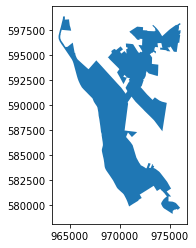

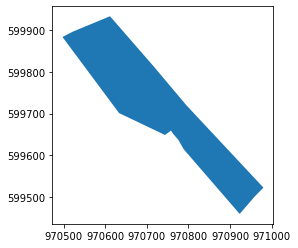

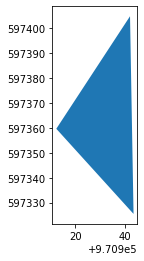

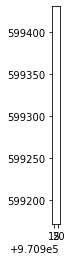

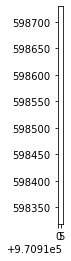

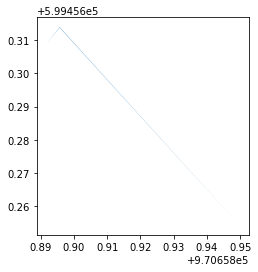

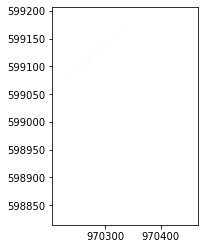

In [50]:
#Reassign values for Hendersonville-2 to the correct precincts
hendersonville2_ex.reset_index(inplace=True,drop=False)
for i in list(hendersonville2_ex['level_1']):
    sub = hendersonville2_ex[hendersonville2_ex['level_1']==i]
    sub.plot() 
hendersonville2_ex = hendersonville2_ex.iloc[:3]
hendersonville2_ex['enr_desc_1'] = ['HENDERSONVILLE-2','CV_CAROLINA VILLAGE','NORTHEAST']
hendersonville2_ex['prec_id_1'] = ['HV-2','CV','NE']

display(hendersonville2_ex)
#hendersonville2_ex.to_file('./test_hendersonville2.shp')

In [51]:
#Clean VEST columns
display(nc19_sub.head(1))
nc19_sub = nc19_sub[['prec_id','enr_desc','county_nam','geometry']]
display(nc19_sub)

,id,prec_id,enr_desc,county_nam,of_prec_id,county_id,geometry,HOLD
2059,2016,07-07A,07-07A,WAKE,07-07,92,"POLYGON ((2097254.466 776939.253, 2097170.528 ...",DIS


,prec_id,enr_desc,county_nam,geometry
2059,07-07A,07-07A,WAKE,"POLYGON ((2097254.466 776939.253, 2097170.528 ..."
2689,01-07A,01-07A,WAKE,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2696,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((973349.550 598008.698, 973249.732 59..."


In [55]:
#Subset out Hendersonville columns so they are uniform
display(hendersonville2_ex)
hendersonville2_ex = hendersonville2_ex[['prec_id_1','enr_desc_1','county_nam_1','geometry']]
hendersonville2_ex.rename(columns = {'prec_id_1':'prec_id','enr_desc_1':'enr_desc','county_nam_1':'county_nam'},inplace=True)
display(hendersonville2_ex)

,level_0,level_1,id_1,prec_id_1,enr_desc_1,county_nam_1,of_prec_id_1,county_id_1,id_2,prec_id_2,enr_desc_2,county_nam_2,of_prec_id_2,county_id_2,geometry
0,1844,0,1968.0,HV-2,HENDERSONVILLE-2,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,1844,1,1968.0,CV,CV_CAROLINA VILLAGE,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((970788.512 599614.225, 970776.146 59..."
2,1844,2,1968.0,NE,NORTHEAST,HENDERSON,None,45.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((970912.386 597359.694, 970942.007 59..."


C:\Users\SpencerNelson\AppData\Local\Temp\ipykernel_14488\2183683897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hendersonville2_ex.rename(columns = {'prec_id_1':'prec_id','enr_desc_1':'enr_desc','county_nam_1':'county_nam'},inplace=True)


,prec_id,enr_desc,county_nam,geometry
0,HV-2,HENDERSONVILLE-2,HENDERSON,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((970788.512 599614.225, 970776.146 59..."
2,NE,NORTHEAST,HENDERSON,"POLYGON ((970912.386 597359.694, 970942.007 59..."


In [57]:
#Subset out NC 22 columns so they match the other two dataframes
display(nc22_holes.head(1))
nc22_holes.rename(columns = {'prec_id_1':'prec_id','enr_desc_1':'enr_desc','county_nam_1':'county_nam'},inplace=True)
nc22_holes = nc22_holes[['prec_id','enr_desc','county_nam','geometry']]
display(nc22_holes)
print(len(nc22_holes))

,id_1,prec_id_1,enr_desc_1,county_nam_1,of_prec_id_1,county_id_1,id_2,prec_id_2,enr_desc_2,county_nam_2,of_prec_id_2,county_id_2,geometry
0,1.0,0003,ALBEMARLE NUMBER 3,STANLY,None,84.0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1644857.853 584760.831, 1644768.728 ..."


,prec_id,enr_desc,county_nam,geometry
0,0003,ALBEMARLE NUMBER 3,STANLY,"POLYGON ((1644857.853 584760.831, 1644768.728 ..."
1,0003,DREXEL 03,BURKE,"POLYGON ((1220715.101 726879.358, 1220723.026 ..."
2,0019,LINVILLE 01,BURKE,"POLYGON ((1142032.036 735283.149, 1141893.094 ..."
3,0019,RIDENHOUR,STANLY,"POLYGON ((1590551.101 597789.851, 1590587.761 ..."
4,007,007,MECKLENBURG,"POLYGON ((1465943.013 524872.128, 1465762.759 ..."
...,...,...,...,...
2647,JMV,JAMESVILLE,MARTIN,"POLYGON ((2656570.989 769941.315, 2656623.057 ..."
2648,GRF,GRIFFINS,MARTIN,"POLYGON ((2572997.648 730116.690, 2572954.935 ..."
2649,GSN,GOOSE NEST,MARTIN,"POLYGON ((2489121.775 774862.002, 2489165.442 ..."
2650,RBV,ROBERSONVILLE,MARTIN,"POLYGON ((2492739.958 755657.848, 2492576.655 ..."


2652


In [58]:
#Remove Hendersonville-2 from the NC22 file and concat back the exploded and reassigned Hendersonville-2 gdf and the VEST precincts gdf
nc22_holes = nc22_holes[nc22_holes['enr_desc']!='HENDERSONVILLE-2']
full_state = gp.GeoDataFrame(pd.concat([nc19_sub,hendersonville2_ex,nc22_holes]),crs=crs)
display(full_state)

,prec_id,enr_desc,county_nam,geometry
2059,07-07A,07-07A,WAKE,"POLYGON ((2097254.466 776939.253, 2097170.528 ..."
2689,01-07A,01-07A,WAKE,"MULTIPOLYGON (((2104589.500 741442.312, 210458..."
2696,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((973349.550 598008.698, 973249.732 59..."
0,HV-2,HENDERSONVILLE-2,HENDERSON,"POLYGON ((972037.855 581066.196, 971978.045 58..."
1,CV,CV_CAROLINA VILLAGE,HENDERSON,"POLYGON ((970788.512 599614.225, 970776.146 59..."
...,...,...,...,...
2647,JMV,JAMESVILLE,MARTIN,"POLYGON ((2656570.989 769941.315, 2656623.057 ..."
2648,GRF,GRIFFINS,MARTIN,"POLYGON ((2572997.648 730116.690, 2572954.935 ..."
2649,GSN,GOOSE NEST,MARTIN,"POLYGON ((2489121.775 774862.002, 2489165.442 ..."
2650,RBV,ROBERSONVILLE,MARTIN,"POLYGON ((2492739.958 755657.848, 2492576.655 ..."


In [59]:
#Fill NA for the columns to ensure they get grouped correctly in the dissolve, then perform the dissolve
full_state['enr_desc'] = full_state['enr_desc'].fillna('0')
full_state['prec_id'] = full_state['prec_id'].fillna('0')
full_state['county_nam'] = full_state['county_nam'].fillna('0')
full_state['DIS_COL'] = full_state['prec_id']+full_state['enr_desc'] + full_state['county_nam']
full_state_dis = full_state.dissolve(by='DIS_COL')
print(len(full_state_dis))
print(len(nc22))

2655
2652


In [60]:
#Confirm the length of the new file is the lenght of the original + 3
diff = len(full_state_dis)-len(nc22)
if diff == 3:
    print('Precincts were successfully added.')
else:
    print('There was an issue with adding back the precincts.')

Precincts were successfully added.


In [61]:
full_state_dis.to_file('./full_nc22.shp')